## Домашнее задание №1 - Изучение методов анализа и классификации данных

### Подготовка окружения

Выполняем первоначальную установку всех необходимых зависимостей из файла `requirements.txt`. Это необходимо для работы с данными, визуализацией и машинным обучением. Используем текущий интерпретатор Python для обеспечения совместимости.

In [104]:
import sys
import subprocess
subprocess.check_call([sys.executable, "-m", "pip", "install", "-r", "requirements.txt"])

0

### Вспомогательные функции

Определяем вспомогательные функции, которые будут использоваться в ходе анализа:
- `plot_corr_matrix()` - визуализация корреляционной матрицы для выявления взаимосвязей между признаками
- `remove_outliers_quartile()` - удаление выбросов методом межквартильного размаха (IQR)
- `remove_outliers_zscore()` - удаление выбросов на основе Z-оценки
- `cross_validation()` - функция кросс-валидации для оценки качества модели


In [ ]:
def plot_corr_matrix(df):
    # Построение матрицы корреляции
    correlation_matrix = df[df.select_dtypes(include=['float64', 'int64']).columns].corr()
    
    # Визуализация матрицы корреляции
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Матрица корреляции')
    plt.show()

In [106]:
def remove_outliers_quartile(df):
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

def remove_outliers_zscore(df, threshold=3):
    z_scores = np.abs(stats.zscore(df.select_dtypes(include=['float64', 'int64'])))
    filtered_entries = (z_scores < threshold).all(axis=1)
    return df[filtered_entries]

In [107]:
def cross_validation(clf, X, y):
    """
    Выполняет кросс-валидацию для модели RandomForest и возвращает результаты точности на каждом этапе,
    а также наилучшую обученную модель с максимальной точностью.

    Параметры:
    - clf (Модель классификации, например, RandomForest)
    - X (DataFrame или массив): Признаки (features) набора данных.
    - y (Series или массив): Метки классов (targets) набора данных.

    Возвращает:
    - accuracy_scores(list): Массив точностей на каждом фолде.
    - best_сlf  (тип исходной модели): Наилучший экземпляр полученный на кросс-валидации
    """
    skf = StratifiedKFold(n_splits=3)
    accuracy_scores = []
    clfs = []
    for train, test in skf.split(X, y):
        X_train, y_train, X_test, y_test = X[train], y[train], X[test], y[test]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        clfs.append(clf)
    return accuracy_scores, clfs[max(enumerate(accuracy_scores),key=lambda x: x[1])[0]]

In [108]:
# Загрузка данных
df = load_data('Stepanov_dataset.csv')
print(f"Размер датасета: {df.shape}")
print(f"\nПервые 5 строк:")
df.head()

Размер датасета: (5455, 11)

Первые 5 строк:


,Flow,max_interpacket_interval,min_interpacket_interval,avg_interpacket_interval,sum_interpacket_interval,max_packet_length,min_packet_length,avg_packet_length,sum_packet_length,mode_packet_length,label
0,123.168.64.34:62191<-->37.110.160.212:443,-1.885277,3.134675e-06,-0.311712,-28.374947,1275.377697,63.517180,324.643028,-12214.041902,1296.642230,normal
1,35.133.147.63:4992<-->97.80.153.172:443,5.459371,1.002663e-06,0.641325,33.182560,1447.710138,54.310543,406.047190,15585.657071,50.109430,normal
2,220.46.60.13:3034<-->217.143.209.148:443,41.436540,1.243734e-05,4.372300,133.452292,1514.656332,54.345127,356.623217,46587.409311,46.187227,normal
3,197.197.77.101:1716<-->66.46.255.128:443,5.385340,9.523780e-07,-0.133201,1.466238,1379.700606,54.091068,1188.022354,429727.182913,1347.796213,normal
4,29.55.203.221:58901<-->27.181.217.107:443,44.576122,-4.648416e-06,1.499935,21.531668,1286.205814,54.480931,224.276424,21903.497906,53.003093,normal


### Шаг 1: Вывод общей информации о столбцах данных и их типах


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5455 entries, 0 to 5454
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Flow                      5455 non-null   object 
 1   max_interpacket_interval  5455 non-null   float64
 2   min_interpacket_interval  5455 non-null   float64
 3   avg_interpacket_interval  5455 non-null   float64
 4   sum_interpacket_interval  5455 non-null   float64
 5   max_packet_length         5455 non-null   float64
 6   min_packet_length         5455 non-null   float64
 7   avg_packet_length         5455 non-null   float64
 8   sum_packet_length         5455 non-null   float64
 9   mode_packet_length        5455 non-null   float64
 10  label                     5455 non-null   object 
dtypes: float64(9), object(2)
memory usage: 468.9+ KB


**Гистограммы** позволяют визуально оценить распределение значений каждого признака:

- **Нормальное распределение** - данные симметричны относительно среднего (идеально для многих алгоритмов)
- **Смещённое распределение** - большинство значений находится на одной стороне (может потребовать преобразования)
- **Многомодальное распределение** - несколько пиков (может указывать на разные подгруппы данных)

Анализ гистограмм помогает понять природу данных и выбрать правильные методы преобразования и нормализации.


## Шаг 2: Вывод общей статистической информации о данных


In [ ]:
df.describe()


,max_interpacket_interval,min_interpacket_interval,avg_interpacket_interval,sum_interpacket_interval,max_packet_length,min_packet_length,avg_packet_length,sum_packet_length,mode_packet_length
count,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5.455000e+03,5455.000000
mean,20.800602,0.000026,1.460684,83.926283,1211.524362,55.355722,331.714205,2.892992e+05,215.992506
std,86.125284,0.000186,6.645744,467.015278,678.267141,17.071199,257.915343,2.928426e+06,431.919092
min,-9.958636,-0.000020,-0.627619,-51.812756,28.388185,52.214298,38.455150,-4.018471e+05,11.882990
25%,2.142751,-0.000003,0.100709,1.696945,586.937661,53.696817,130.769070,-4.759527e+04,48.083089
50%,8.129457,0.000001,0.492124,15.174408,1454.499303,54.076195,303.814308,1.525297e+04,57.961038
75%,17.072856,0.000006,1.135114,42.144740,1511.665236,54.531128,394.993830,8.020959e+04,70.401350
max,2396.760870,0.007265,332.261863,10427.448262,7313.457889,1241.646033,1626.447273,1.128913e+08,1543.828372


## Шаг 3: Проверка пропусков данных


In [ ]:
missing_values = df.isnull().sum()
print("Пропущенные значения в каждом столбце:")
print(missing_values)
print(f"\nВсего пропущенных значений: {missing_values.sum()}")
if missing_values.sum() == 0:
    print("Пропущенных значений не обнаружено ✓")


Пропущенные значения в каждом столбце:
Flow                        0
max_interpacket_interval    0
min_interpacket_interval    0
avg_interpacket_interval    0
sum_interpacket_interval    0
max_packet_length           0
min_packet_length           0
avg_packet_length           0
sum_packet_length           0
mode_packet_length          0
label                       0
dtype: int64

Всего пропущенных значений: 0
Пропущенных значений не обнаружено ✓


## Шаг 4: Построение распределения исходных данных (гистограммы)


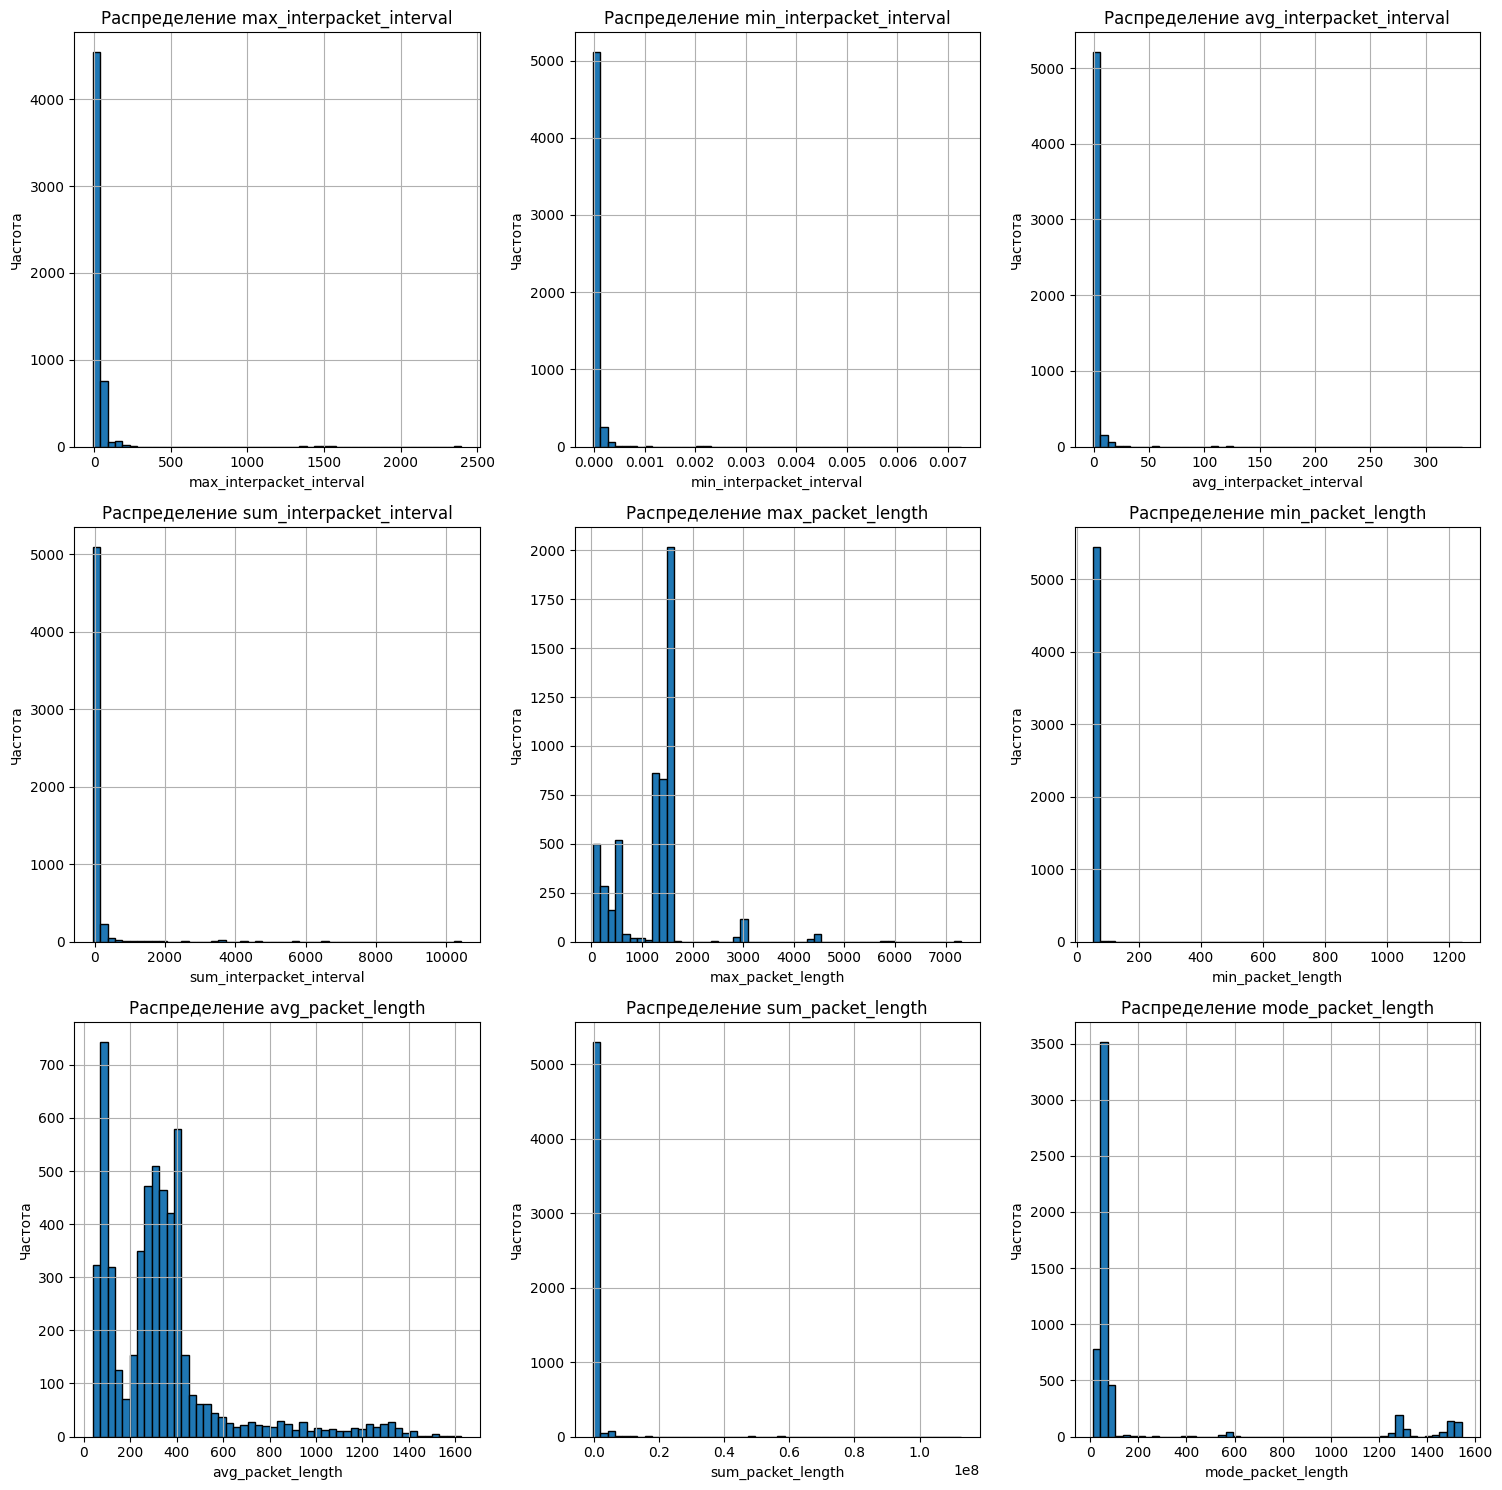

In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'label' in numeric_columns:
    numeric_columns.remove('label')

n_cols = 3
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten() if len(numeric_columns) > 1 else [axes]

for idx, col in enumerate(numeric_columns):
    if idx < len(axes):
        df[col].hist(bins=50, ax=axes[idx], edgecolor='black')
        axes[idx].set_title(f'Распределение {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Частота')

# Скрываем лишние подграфики
for idx in range(len(numeric_columns), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()


## Шаг 5: Построение boxplot для визуализации выбросов


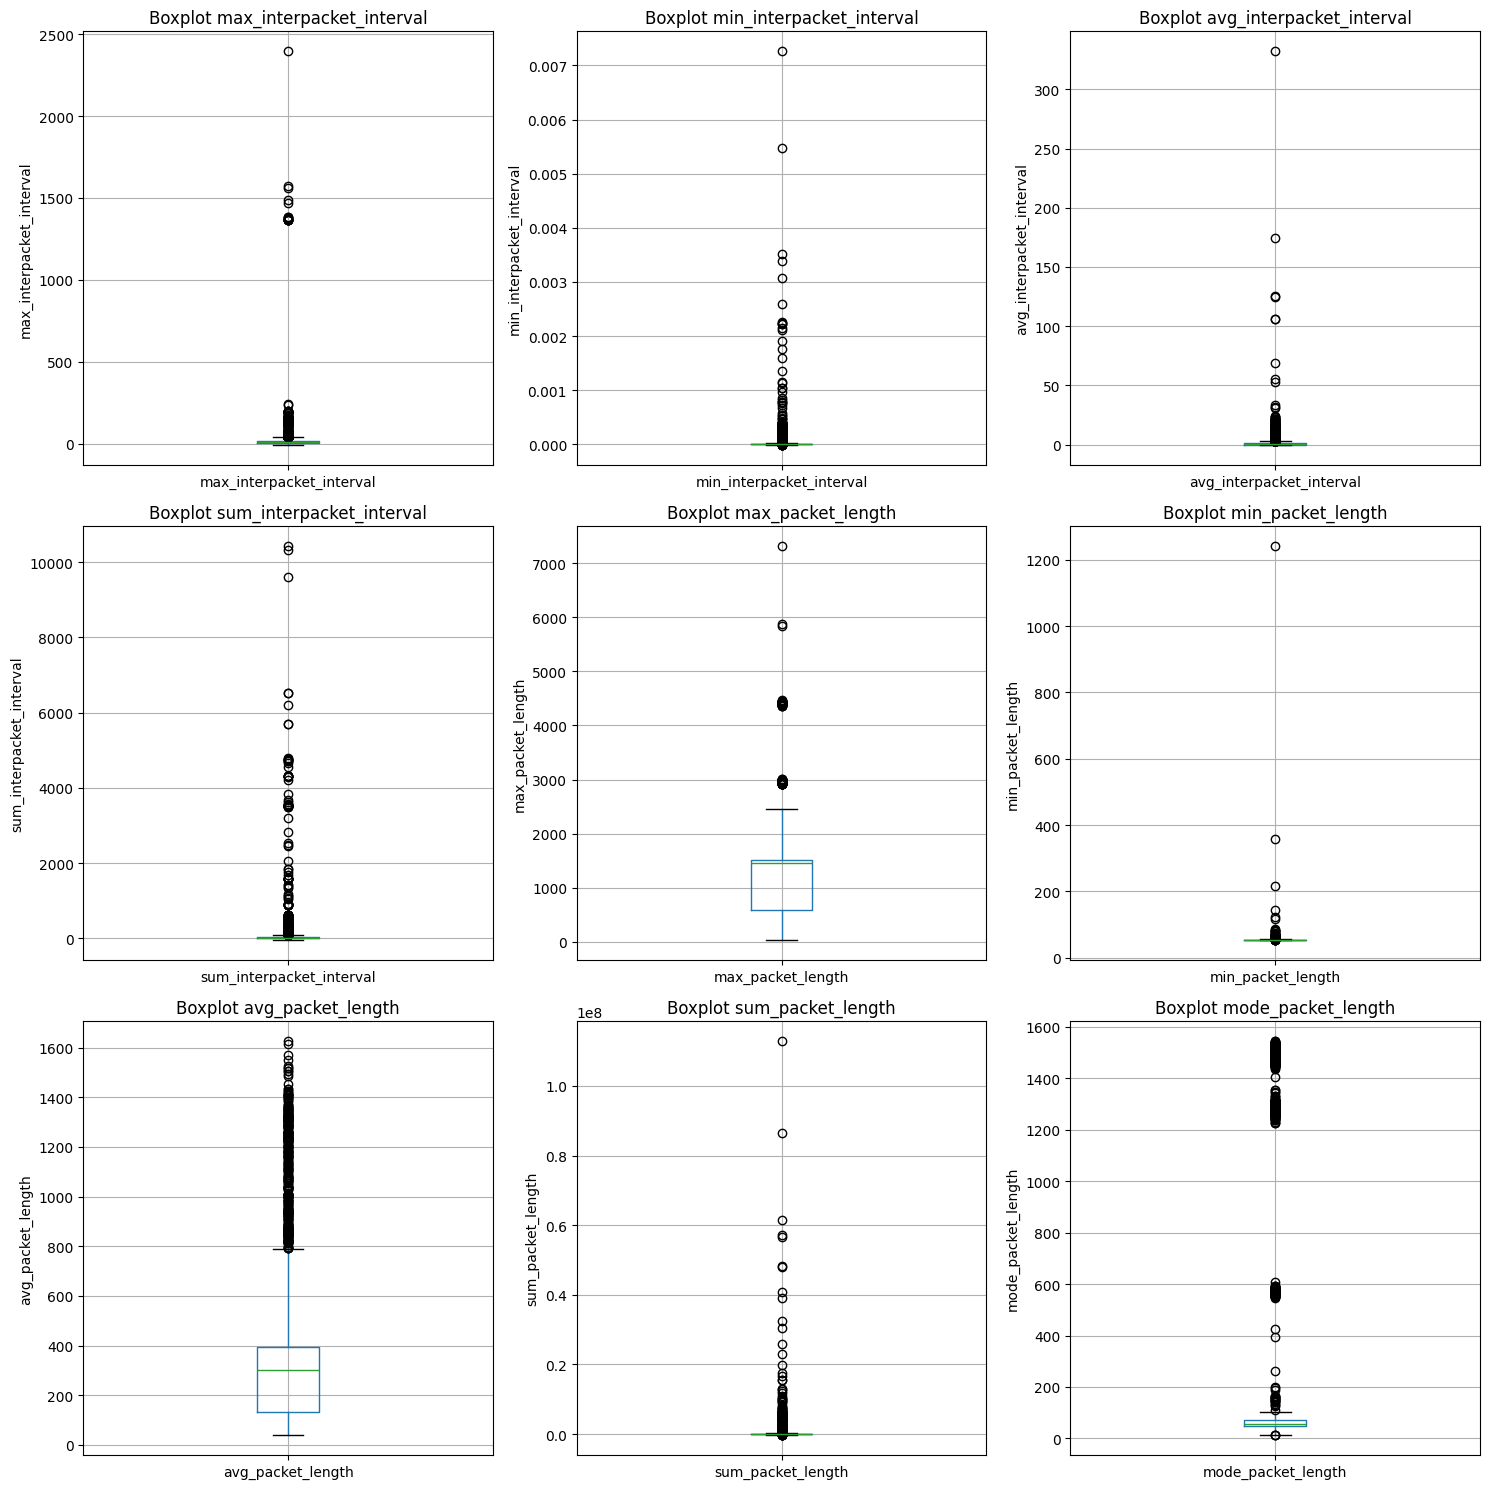

In [ ]:
n_cols = 3
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten() if len(numeric_columns) > 1 else [axes]

for idx, col in enumerate(numeric_columns):
    if idx < len(axes):
        df.boxplot(column=col, ax=axes[idx])
        axes[idx].set_title(f'Boxplot {col}')
        axes[idx].set_ylabel(col)

# Скрываем лишние подграфики
for idx in range(len(numeric_columns), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()


## Шаг 6: Построение матрицы корреляции


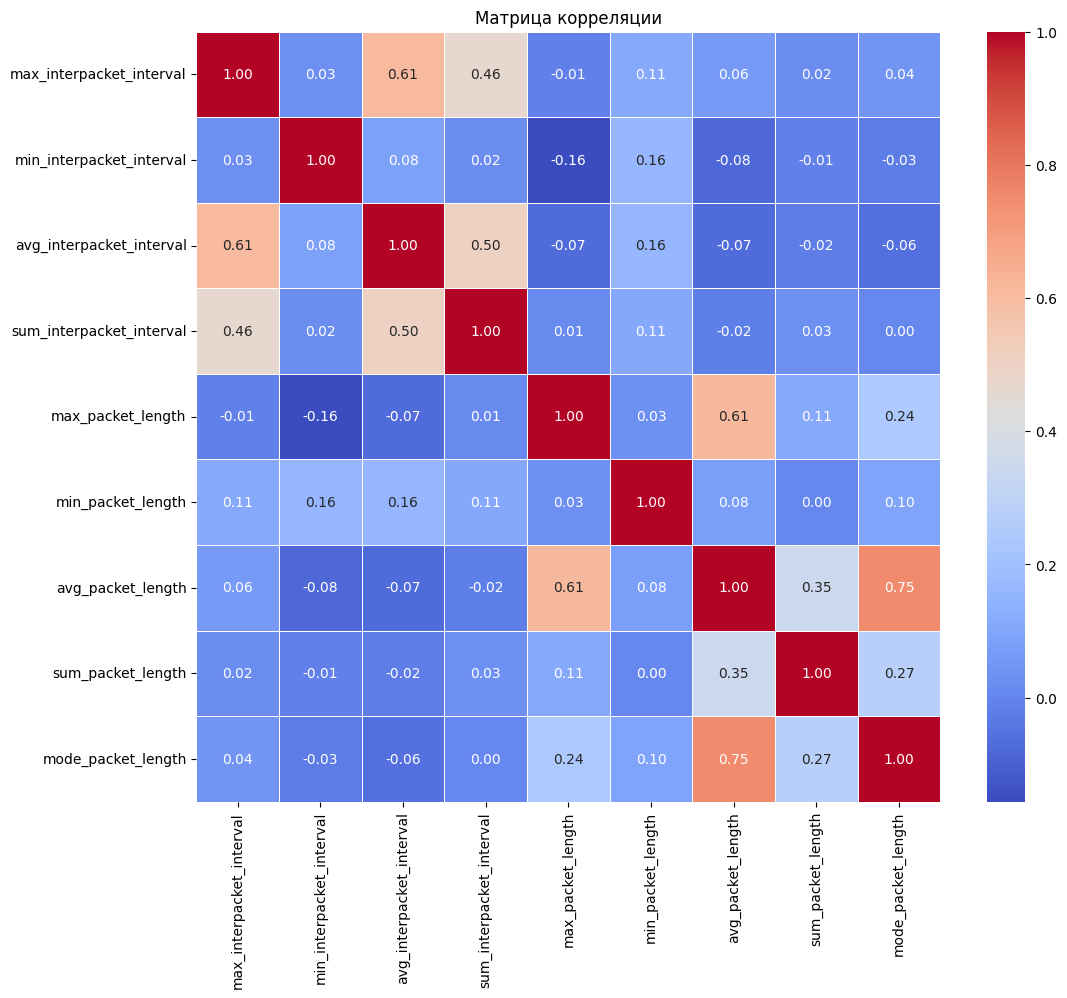

In [ ]:
plot_corr_matrix(df)


Количество классов: 2
Уникальные классы: ['normal' 'malicious']

Распределение классов:
label
normal       4901
malicious     554
Name: count, dtype: int64

Процентное соотношение:
label
normal       89.84418
malicious    10.15582
Name: proportion, dtype: float64


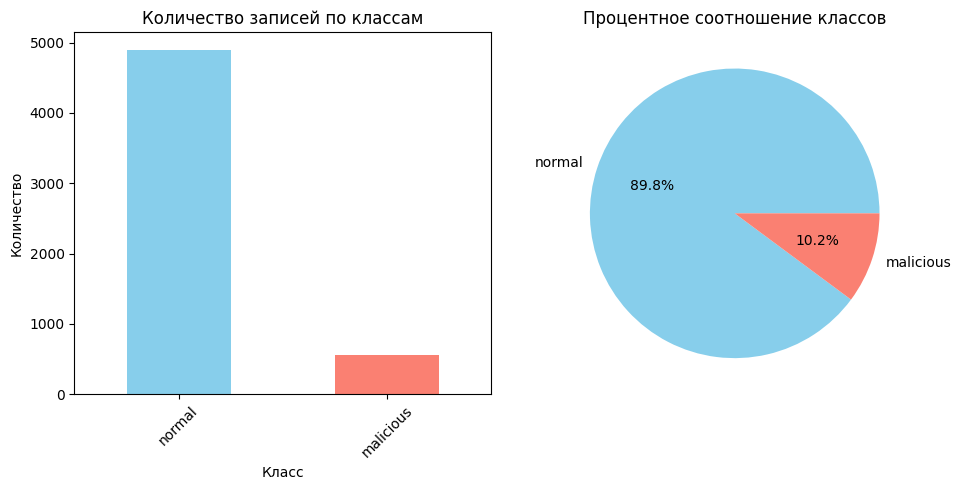

In [ ]:
print(f"Количество классов: {df['label'].nunique()}")
print(f"Уникальные классы: {df['label'].unique()}")
print(f"\nРаспределение классов:")
class_counts = df['label'].value_counts()
print(class_counts)
print(f"\nПроцентное соотношение:")
class_percentages = df['label'].value_counts(normalize=True) * 100
print(class_percentages)

# Визуализация соотношения классов
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Количество записей по классам')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
class_percentages.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Процентное соотношение классов')
plt.ylabel('')

plt.tight_layout()
plt.show()


## Шаг 8: Итоги исследования исходного набора данных

### Выводы:
1. **Структура данных**: Датасет содержит числовые признаки, характеризующие сетевые потоки (интервалы между пакетами, размеры пакетов и т.д.)

2. **Качество данных**: Пропущенных значений нет (они были удалены функцией load_data)

3. **Распределение признаков**: Признаки имеют различный масштаб, что требует нормализации/стандартизации перед обучением модели

4. **Выбросы**: Boxplot показывает наличие выбросов во многих признаках, что требует фильтрации

5. **Корреляции**: Матрица корреляции показывает взаимосвязи между признаками

6. **Дисбаланс классов**: Наблюдается дисбаланс классов (normal значительно преобладает над malicious), что следует учитывать при фильтрации и обучении

7. **Признаки для обучения**: Все числовые признаки (кроме столбца 'Flow', если он не числовой) могут быть использованы для обучения. Столбец 'label' является целевой переменной.


## Фильтрация данных

Разделим DataFrame относительно классов, чтобы доминирующий класс не повлиял на фильтрацию данных меньших классов.


In [116]:
# Разделение данных по классам перед фильтрацией
df_normal = df[df['label'] == 'normal'].copy()
df_malicious = df[df['label'] == 'malicious'].copy()

print(f"Размер normal класса до фильтрации: {len(df_normal)}")
print(f"Размер malicious класса до фильтрации: {len(df_malicious)}")


Размер normal класса до фильтрации: 4901
Размер malicious класса до фильтрации: 554


### Фильтрация методом квартилей (IQR)


In [117]:
# Фильтрация методом квартилей для каждого класса отдельно
df_normal_filtered = remove_outliers_quartile(df_normal.copy())
df_malicious_filtered = remove_outliers_quartile(df_malicious.copy())

# Объединение отфильтрованных данных
df_filtered_quartile = pd.concat([df_normal_filtered, df_malicious_filtered], ignore_index=True)

print(f"Размер normal класса после фильтрации: {len(df_normal_filtered)} (удалено {len(df_normal) - len(df_normal_filtered)} записей)")
print(f"Размер malicious класса после фильтрации: {len(df_malicious_filtered)} (удалено {len(df_malicious) - len(df_malicious_filtered)} записей)")
print(f"Общий размер датасета после фильтрации квартилями: {len(df_filtered_quartile)}")
print(f"Удалено всего записей: {len(df) - len(df_filtered_quartile)}")


Размер normal класса после фильтрации: 2968 (удалено 1933 записей)
Размер malicious класса после фильтрации: 355 (удалено 199 записей)
Общий размер датасета после фильтрации квартилями: 3323
Удалено всего записей: 2132


### Фильтрация методом Z-score


In [118]:
# Фильтрация методом Z-score для каждого класса отдельно
df_normal_filtered_z = remove_outliers_zscore(df_normal.copy(), threshold=3)
df_malicious_filtered_z = remove_outliers_zscore(df_malicious.copy(), threshold=3)

# Объединение отфильтрованных данных
df_filtered_zscore = pd.concat([df_normal_filtered_z, df_malicious_filtered_z], ignore_index=True)

print(f"Размер normal класса после фильтрации Z-score: {len(df_normal_filtered_z)} (удалено {len(df_normal) - len(df_normal_filtered_z)} записей)")
print(f"Размер malicious класса после фильтрации Z-score: {len(df_malicious_filtered_z)} (удалено {len(df_malicious) - len(df_malicious_filtered_z)} записей)")
print(f"Общий размер датасета после фильтрации Z-score: {len(df_filtered_zscore)}")
print(f"Удалено всего записей: {len(df) - len(df_filtered_zscore)}")


Размер normal класса после фильтрации Z-score: 4601 (удалено 300 записей)
Размер malicious класса после фильтрации Z-score: 491 (удалено 63 записей)
Общий размер датасета после фильтрации Z-score: 5092
Удалено всего записей: 363


### Сравнение результатов фильтрации и boxplot после фильтрации

Для дальнейшей работы используем данные, отфильтрованные методом квартилей.


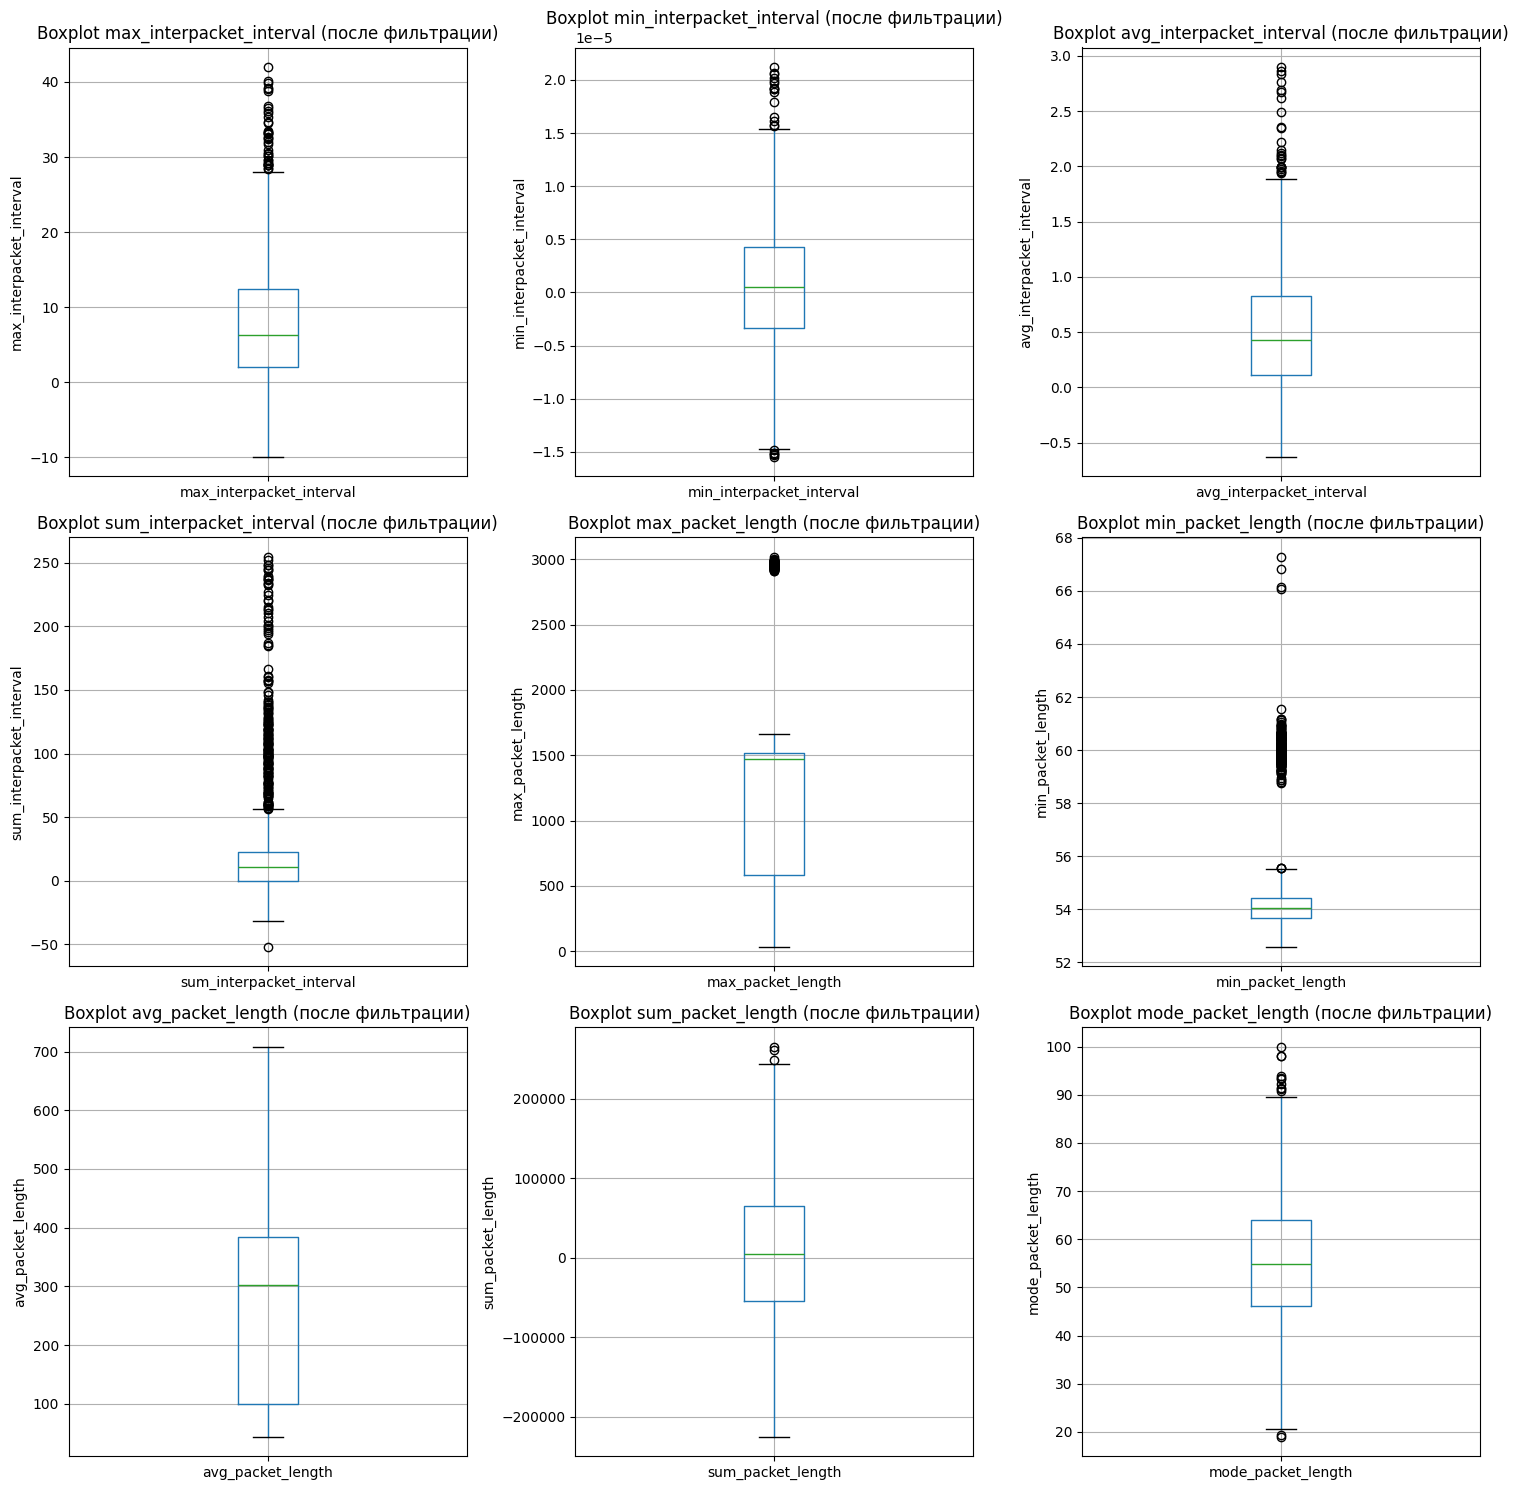


Вывод: После фильтрации количество выбросов значительно уменьшилось, что видно из сравнения boxplot до и после фильтрации.


In [119]:
# Используем данные, отфильтрованные методом квартилей
df_filtered = df_filtered_quartile.copy()

# Boxplot после фильтрации
n_cols = 3
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten() if len(numeric_columns) > 1 else [axes]

for idx, col in enumerate(numeric_columns):
    if idx < len(axes):
        df_filtered.boxplot(column=col, ax=axes[idx])
        axes[idx].set_title(f'Boxplot {col} (после фильтрации)')
        axes[idx].set_ylabel(col)

# Скрываем лишние подграфики
for idx in range(len(numeric_columns), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

print("\nВывод: После фильтрации количество выбросов значительно уменьшилось, что видно из сравнения boxplot до и после фильтрации.")


## Преобразование данных

Применим два метода преобразования данных: StandardScaler и PowerTransformer.


In [120]:
# Подготовка данных для преобразования
# Исключаем нечисловые столбцы
feature_columns = df_filtered.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'label' in feature_columns:
    feature_columns.remove('label')

X_filtered = df_filtered[feature_columns].copy()
y_filtered = df_filtered['label'].copy()

print(f"Признаки для преобразования: {feature_columns}")
print(f"Размер данных: {X_filtered.shape}")


Признаки для преобразования: ['max_interpacket_interval', 'min_interpacket_interval', 'avg_interpacket_interval', 'sum_interpacket_interval', 'max_packet_length', 'min_packet_length', 'avg_packet_length', 'sum_packet_length', 'mode_packet_length']
Размер данных: (3323, 9)


### Преобразование StandardScaler


Преобразование StandardScaler выполнено.
Средние значения после стандартизации (должны быть близки к 0):
max_interpacket_interval   -6.842422e-17
min_interpacket_interval   -8.553027e-18
avg_interpacket_interval    4.276514e-17
sum_interpacket_interval   -1.710605e-17
max_packet_length          -3.421211e-17
dtype: float64

Стандартные отклонения после стандартизации (должны быть близки к 1):
max_interpacket_interval    1.000151
min_interpacket_interval    1.000151
avg_interpacket_interval    1.000151
sum_interpacket_interval    1.000151
max_packet_length           1.000151
dtype: float64


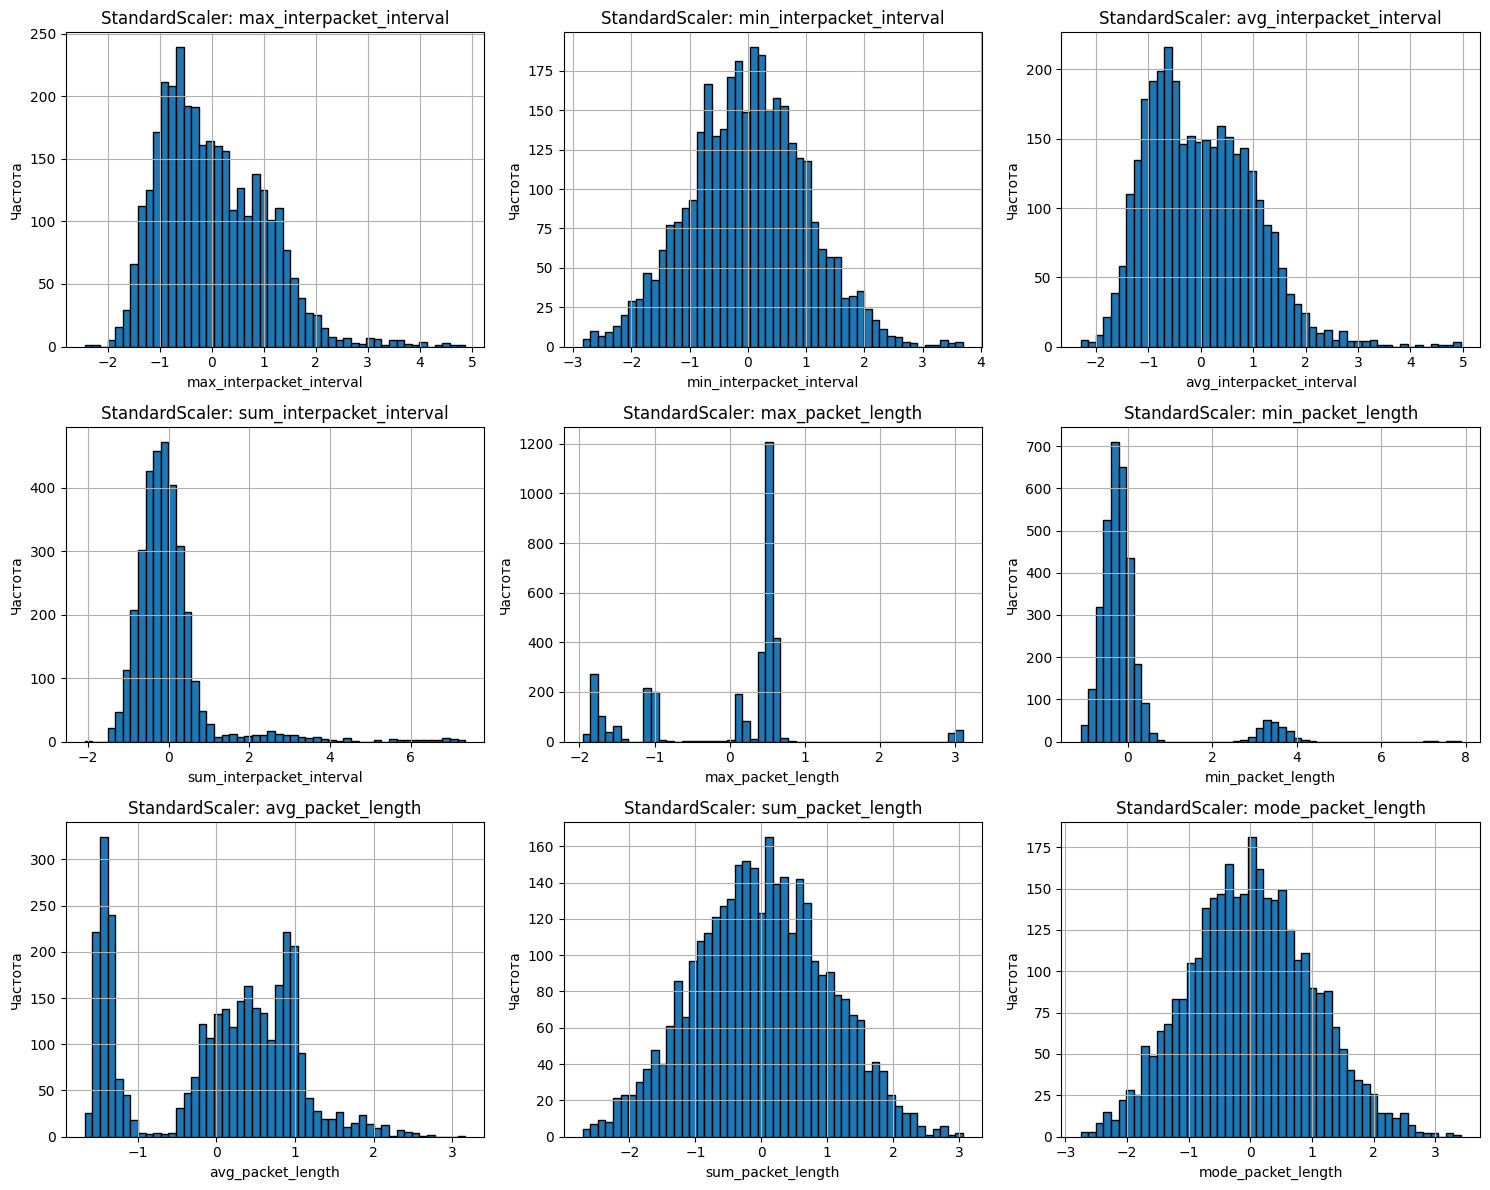

In [121]:
# Применение StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_columns, index=X_filtered.index)

print("Преобразование StandardScaler выполнено.")
print(f"Средние значения после стандартизации (должны быть близки к 0):\n{X_scaled_df.mean().head()}")
print(f"\nСтандартные отклонения после стандартизации (должны быть близки к 1):\n{X_scaled_df.std().head()}")

# Визуализация распределений после StandardScaler
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, col in enumerate(feature_columns[:9]):  # Первые 9 признаков
    X_scaled_df[col].hist(bins=50, ax=axes[idx], edgecolor='black')
    axes[idx].set_title(f'StandardScaler: {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Частота')

plt.tight_layout()
plt.show()


### Преобразование PowerTransformer


Преобразование PowerTransformer (Yeo-Johnson) выполнено.
Средние значения после преобразования:
max_interpacket_interval   -1.111894e-16
min_interpacket_interval    2.138257e-17
avg_interpacket_interval   -8.553027e-17
sum_interpacket_interval    0.000000e+00
max_packet_length           1.454015e-16
dtype: float64

Стандартные отклонения после преобразования:
max_interpacket_interval    1.000151
min_interpacket_interval    1.000151
avg_interpacket_interval    1.000151
sum_interpacket_interval    1.000151
max_packet_length           1.000151
dtype: float64


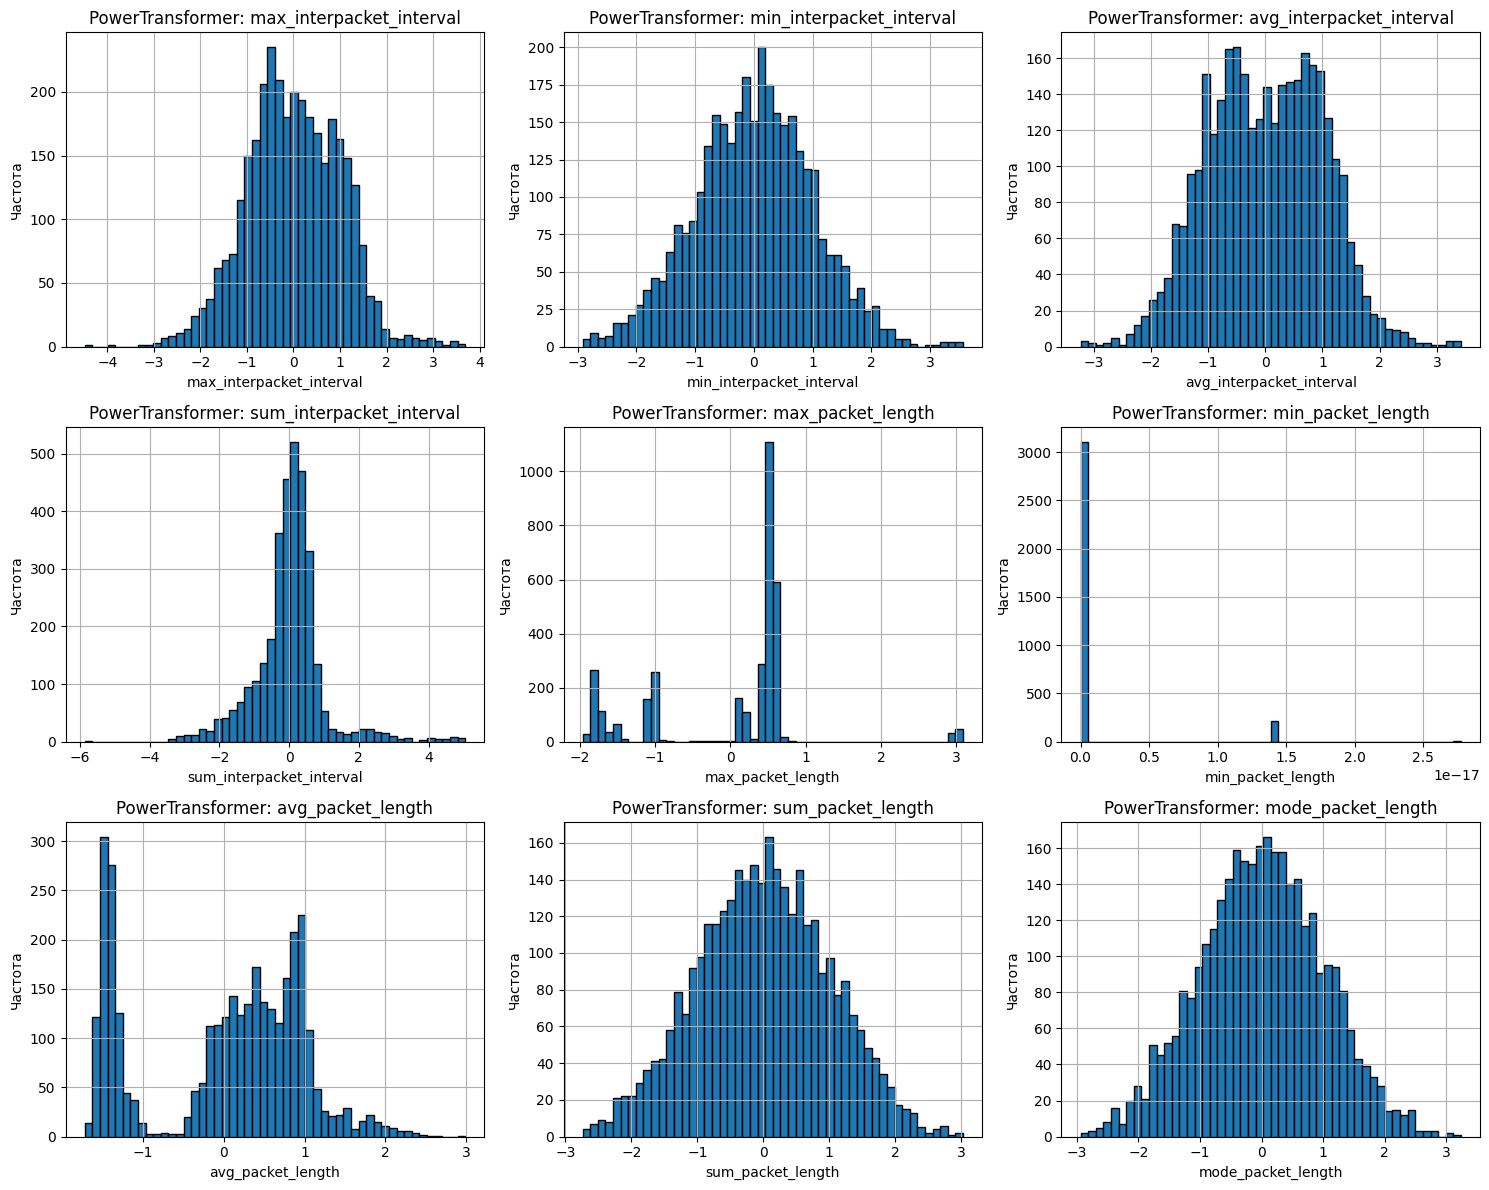

In [122]:
# Применение PowerTransformer (Yeo-Johnson, так как есть отрицательные значения)
power_transformer = PowerTransformer(method='yeo-johnson')
X_transformed = power_transformer.fit_transform(X_filtered)
X_transformed_df = pd.DataFrame(X_transformed, columns=feature_columns, index=X_filtered.index)

print("Преобразование PowerTransformer (Yeo-Johnson) выполнено.")
print(f"Средние значения после преобразования:\n{X_transformed_df.mean().head()}")
print(f"\nСтандартные отклонения после преобразования:\n{X_transformed_df.std().head()}")

# Визуализация распределений после PowerTransformer
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, col in enumerate(feature_columns[:9]):  # Первые 9 признаков
    X_transformed_df[col].hist(bins=50, ax=axes[idx], edgecolor='black')
    axes[idx].set_title(f'PowerTransformer: {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Частота')

plt.tight_layout()
plt.show()


### Выбор метода преобразования

Для обучения модели выберем StandardScaler, так как он хорошо подходит для RandomForest и сохраняет интерпретируемость данных.


In [123]:
# Используем данные, преобразованные StandardScaler
X_final = X_scaled_df.copy()
y_final = y_filtered.copy()

# Преобразуем метки в числовой формат для обучения
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_final)

print(f"Размер финального датасета: {X_final.shape}")
print(f"Классы после кодирования: {label_encoder.classes_}")
print(f"Соответствие: {dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))}")


Размер финального датасета: (3323, 9)
Классы после кодирования: ['malicious' 'normal']
Соответствие: {'malicious': 0, 'normal': 1}


## Обучение модели RandomForest

Обучим модель RandomForest с использованием кросс-валидации.


In [124]:
# Создание и обучение модели RandomForest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Преобразуем X_final в numpy array для кросс-валидации
X_array = X_final.values

# Выполнение кросс-валидации
accuracy_scores, best_clf = cross_validation(rf_clf, X_array, y_encoded)

print("Результаты кросс-валидации:")
for i, score in enumerate(accuracy_scores, 1):
    print(f"Фолд {i}: {score:.4f} ({score*100:.2f}%)")

print(f"\nСредняя точность: {np.mean(accuracy_scores):.4f} ({np.mean(accuracy_scores)*100:.2f}%)")
print(f"Стандартное отклонение: {np.std(accuracy_scores):.4f}")
print(f"Минимальная точность: {np.min(accuracy_scores):.4f} ({np.min(accuracy_scores)*100:.2f}%)")
print(f"Максимальная точность: {np.max(accuracy_scores):.4f} ({np.max(accuracy_scores)*100:.2f}%)")


Результаты кросс-валидации:
Фолд 1: 0.9720 (97.20%)
Фолд 2: 0.9774 (97.74%)
Фолд 3: 0.9783 (97.83%)

Средняя точность: 0.9759 (97.59%)
Стандартное отклонение: 0.0028
Минимальная точность: 0.9720 (97.20%)
Максимальная точность: 0.9783 (97.83%)


### Визуализация результатов кросс-валидации


Таблица результатов кросс-валидации:
   Фолд Точность Точность (%)
 Фолд 1   0.9720       97.20%
 Фолд 2   0.9774       97.74%
 Фолд 3   0.9783       97.83%
Среднее   0.9759       97.59%


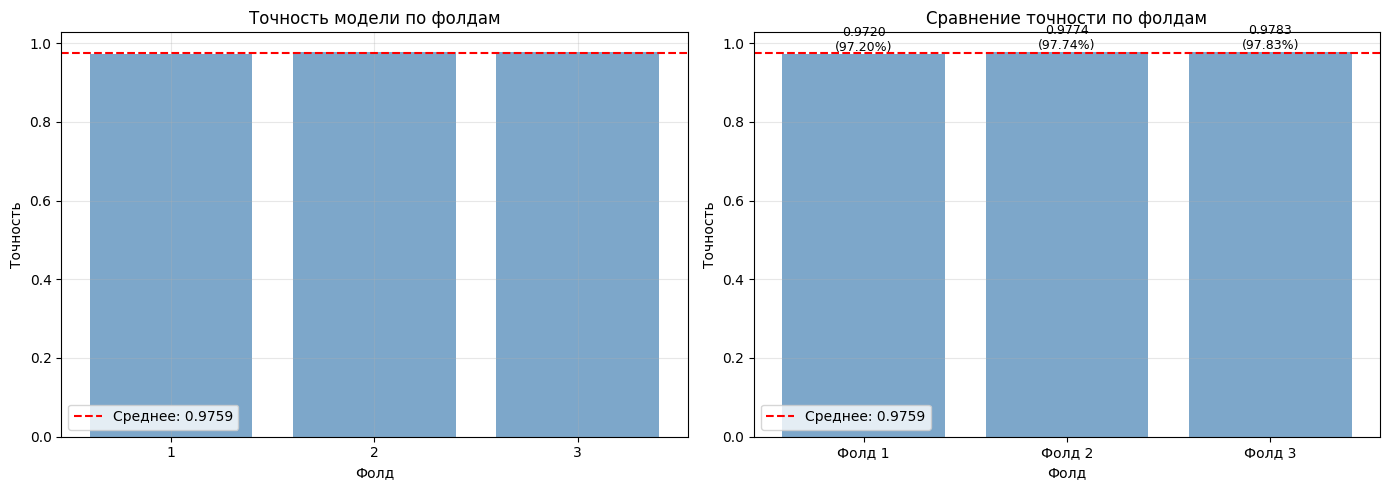

In [125]:
# Создание таблицы результатов кросс-валидации
cv_results = pd.DataFrame({
    'Фолд': [f'Фолд {i}' for i in range(1, len(accuracy_scores) + 1)],
    'Точность': [f'{score:.4f}' for score in accuracy_scores],
    'Точность (%)': [f'{score*100:.2f}%' for score in accuracy_scores]
})

# Добавляем строку со средним значением
cv_results = pd.concat([
    cv_results,
    pd.DataFrame({
        'Фолд': ['Среднее'],
        'Точность': [f'{np.mean(accuracy_scores):.4f}'],
        'Точность (%)': [f'{np.mean(accuracy_scores)*100:.2f}%']
    })
], ignore_index=True)

print("Таблица результатов кросс-валидации:")
print(cv_results.to_string(index=False))

# Визуализация результатов кросс-валидации
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# График точности по фолдам
axes[0].bar(range(1, len(accuracy_scores) + 1), accuracy_scores, color='steelblue', alpha=0.7)
axes[0].axhline(y=np.mean(accuracy_scores), color='r', linestyle='--', label=f'Среднее: {np.mean(accuracy_scores):.4f}')
axes[0].set_xlabel('Фолд')
axes[0].set_ylabel('Точность')
axes[0].set_title('Точность модели по фолдам')
axes[0].set_xticks(range(1, len(accuracy_scores) + 1))
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Столбчатая диаграмма с аннотациями
x_pos = np.arange(len(accuracy_scores))
bars = axes[1].bar(x_pos, accuracy_scores, color='steelblue', alpha=0.7)
axes[1].axhline(y=np.mean(accuracy_scores), color='r', linestyle='--', label=f'Среднее: {np.mean(accuracy_scores):.4f}')
axes[1].set_xlabel('Фолд')
axes[1].set_ylabel('Точность')
axes[1].set_title('Сравнение точности по фолдам')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels([f'Фолд {i+1}' for i in range(len(accuracy_scores))])
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].legend()

# Добавляем значения на столбцы
for i, (bar, score) in enumerate(zip(bars, accuracy_scores)):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{score:.4f}\n({score*100:.2f}%)',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


### Сохранение обученной модели

Сохраним лучшую модель, полученную в результате кросс-валидации, а также необходимые препроцессоры.


In [ ]:
# Сохранение модели
model_data = {
    'model': best_clf,
    'scaler': scaler,
    'label_encoder': label_encoder,
    'feature_columns': feature_columns,
    'accuracy_scores': accuracy_scores,
    'mean_accuracy': np.mean(accuracy_scores)
}

# Сохранение с помощью pickle
model_dump = pickle.dumps(model_data)
print(f"Модель сохранена.")

with open('rf_model_dump.pkl', 'wb') as f:
    pickle.dump(model_data, f)

print("Модель сохранена в файл 'rf_model_dump.pkl'")


Модель сохранена. Размер дампа: 960426 байт
Модель сохранена в файл 'rf_model_dump.pkl'


### Создание файла submission для Kaggle


In [131]:
# Создание submission файла
submission = pd.DataFrame({
    'ID': range(len(y_pred_labels)),
    'TARGET': y_pred_labels
})

# Сохранение в CSV
submission.to_csv('submission.csv', index=False)
